# Linear Models
#### Kyle McLester

Using the same datasets as in the "Data Visualization" notebook (forestfires)

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
df = pd.read_csv("datasets/forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## Visualize the Data

In [3]:
df.loc[:, ['X', 'Y', 'area']]

,X,Y,area
0,7,5,0.00
1,7,4,0.00
2,7,4,0.00
3,8,6,0.00
4,8,6,0.00
...,...,...,...
512,4,3,6.44
513,2,4,54.29
514,7,4,11.16
515,1,4,0.00


In [4]:
df.loc[:, ['X', 'Y']].max(axis=0)

X    9
Y    9
dtype: int64

In [5]:
df.loc[:, ['X', 'Y']].min(axis=0)

X    1
Y    2
dtype: int64

In [6]:
x_domain, y_doamin = np.arange(start=0, stop=11), np.arange(start=0, stop=11)
print("Domain for the x-axis: {}".format(x_domain))
print("Domain for the y-axis: {}".format(y_doamin))

Domain for the x-axis: [ 0  1  2  3  4  5  6  7  8  9 10]
Domain for the y-axis: [ 0  1  2  3  4  5  6  7  8  9 10]


In [7]:
xs, ys = np.meshgrid(x_domain, y_doamin)

In [8]:
xs

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [9]:
ys

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]])

### Calculate total burned forest area

In [10]:
burned = df.loc[df.loc[:, 'area'] > 0, ['X', 'Y', 'area']]
burned

,X,Y,area
138,9,9,0.36
139,1,4,0.43
140,2,5,0.47
141,1,2,0.55
142,8,6,0.61
...,...,...,...
509,5,4,2.17
510,6,5,0.43
512,4,3,6.44
513,2,4,54.29


In [11]:
zs = np.zeros(xs.shape)
zs

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
fig = plt.figure()
zs = np.zeros(xs.shape)
i = 0
for _, sample in burned.iterrows():
    i+= 1
    x, y = int(sample['X']), int(sample['Y'])
    # print("x-y ({}, {}) = {}".format(x, y, sample['area']))
    zs[y, x] += sample['area']


<Figure size 432x288 with 0 Axes>

In [13]:
pd.DataFrame(zs)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2,0.0,219.94,462.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3,0.0,157.14,0.00,6.58,172.88,0.00,192.78,27.35,26.31,0.00,0.0
4,0.0,150.28,143.37,126.35,397.43,73.75,144.47,474.37,12.18,185.61,0.0
5,0.0,115.47,92.63,2.18,287.01,0.00,1384.05,77.39,2.93,8.16,0.0
6,0.0,0.00,0.00,0.00,87.73,17.62,8.59,86.45,1265.30,42.87,0.0
7,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,185.76,0.00,0.0
9,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.47,0.0


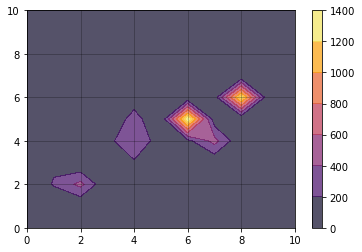

In [14]:
plt.contourf(xs, ys, zs, alpha=0.7, cmap=plt.cm.inferno,)
plt.colorbar()
plt.grid(c='k', ls='-', alpha=0.3)

In [15]:
# Normalize values
log_zs = np.log(zs + 1)

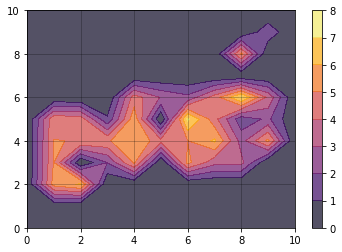

In [16]:
plt.contourf(xs, ys, log_zs, alpha=0.7, cmap=plt.cm.inferno)
plt.colorbar()
plt.grid(c='k', ls='-', alpha=0.3)

## Preprocessing Data

In [17]:
X = df.iloc[:, :-1]
T = df.iloc[:, -1]
N = df.shape[0]

In [18]:
monthdic = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
            'jul': 7, 'aug':8, 'sep':9, 'oct':10, 'nov': 11, 'dec': 12}
daydic = {'mon': 1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7 }

X['month'] = X['month'].apply(lambda x: monthdic[x])
X['day'] = X['day'].apply(lambda x: daydic[x])

In [19]:
X = X.values
T = T.values

In [20]:
Tlog = np.log(T + 1)

In [21]:
bias = np.ones((N,1))
X1 = np.hstack([bias, X])

#### Applying least squares
$$
w = (X^T \cdot X)^{-1} \cdot X^T \cdot T
$$

In [23]:
""" 
Apply Least Squares

The following code also works

w = np.linalg.lstsq(X1.T @ X1, X1.T @ Tlog)[0]
"""
X1_inverse = np.linalg.pinv(X1.T @ X1)
w = X1_inverse @ X1.T @ Tlog
w

array([-0.30477203,  0.0425947 , -0.00129011,  0.1550639 ,  0.00862479,
        0.00502995,  0.00240059, -0.00119776, -0.02492829,  0.00730238,
       -0.00418998,  0.05759247,  0.08504343])

In [25]:
# Calculating predictions
Y = X1 @ w

Checking the accuracy by computing RMSE

1. Calculate the error, i.e. difference in `Tlog` and `Y`  $(Tlog - Y)$
2. Calculate the squared difference in `Tlog` and `Y`  $(Tlog - Y)^2$
3. Calculate MSE or the mean squared error $\frac{1}{N}\sum(Tlog - Y)^2$
4. Calculate RMSE or the root mean squared error $\sqrt{\frac{1}{N}\sum(Tlog - Y)^2}$

In [26]:
E = Tlog - Y
E

array([-9.83710145e-01, -1.17337675e+00, -1.20468948e+00, -6.62126038e-01,
       -5.36517929e-01, -1.39881263e+00, -1.39095028e+00, -9.16238885e-01,
       -1.34829409e+00, -1.32630278e+00, -1.42799699e+00, -8.71468247e-01,
       -1.10886089e+00, -1.21894482e+00, -1.44973973e+00, -1.28358032e+00,
       -9.82795114e-01, -1.43146508e+00, -9.10328725e-01, -1.01678326e+00,
       -1.24452716e+00, -9.96311947e-01, -2.74615833e-01, -1.49844740e+00,
       -1.24070091e+00, -1.28475110e+00, -1.40081735e+00, -1.17198201e+00,
       -1.42257899e+00, -1.36739108e+00, -1.13092152e+00, -1.18254112e+00,
       -1.10650226e+00, -1.16398686e+00, -1.08067163e+00, -1.10831797e+00,
       -1.40413367e+00, -1.24196105e+00, -1.40998675e+00, -7.50319555e-01,
       -1.22554067e+00, -1.21377324e+00, -8.62136405e-01, -1.06805114e+00,
       -9.64698295e-01, -1.09389509e+00, -1.09017434e+00, -1.05145719e+00,
       -6.93732900e-01, -8.72851759e-01, -1.16677330e+00, -1.08359007e+00,
       -1.09074974e+00, -

In [27]:
squared_E = (Tlog - Y)**2
squared_E

array([9.67685650e-01, 1.37681301e+00, 1.45127674e+00, 4.38410891e-01,
       2.87851488e-01, 1.95667677e+00, 1.93474268e+00, 8.39493694e-01,
       1.81789696e+00, 1.75907907e+00, 2.03917541e+00, 7.59456906e-01,
       1.22957247e+00, 1.48582648e+00, 2.10174529e+00, 1.64757843e+00,
       9.65886237e-01, 2.04909227e+00, 8.28698388e-01, 1.03384819e+00,
       1.54884786e+00, 9.92637497e-01, 7.54138555e-02, 2.24534462e+00,
       1.53933874e+00, 1.65058538e+00, 1.96228925e+00, 1.37354184e+00,
       2.02373099e+00, 1.86975837e+00, 1.27898348e+00, 1.39840350e+00,
       1.22434724e+00, 1.35486542e+00, 1.16785118e+00, 1.22836872e+00,
       1.97159137e+00, 1.54246724e+00, 1.98806263e+00, 5.62979435e-01,
       1.50194994e+00, 1.47324548e+00, 7.43279181e-01, 1.14073325e+00,
       9.30642801e-01, 1.19660646e+00, 1.18848008e+00, 1.10556222e+00,
       4.81265336e-01, 7.61870194e-01, 1.36135994e+00, 1.17416745e+00,
       1.18973499e+00, 1.18973499e+00, 1.14609235e+00, 1.53996493e+00,
      

In [28]:
MSE = np.mean((Tlog - Y)**2)
MSE

1.8780043477613277

In [29]:
RMSE = np.sqrt(np.mean((Tlog - Y)**2))
RMSE

1.3704029873585828

In [30]:
pd.DataFrame(Tlog).describe()

,0
count,517.000000
mean,1.111026
std,1.398436
min,0.000000
25%,0.000000
50%,0.418710
75%,2.024193
max,6.995620


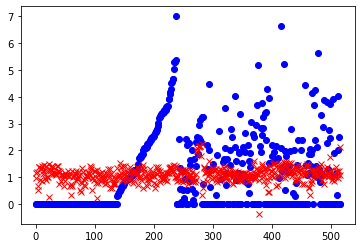

In [31]:
# Plot Tlog and predictions (Y)
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

#### Even though we took the log of T, the data is still heavily distorted

In [32]:
# Print the weights
w

array([-0.30477203,  0.0425947 , -0.00129011,  0.1550639 ,  0.00862479,
        0.00502995,  0.00240059, -0.00119776, -0.02492829,  0.00730238,
       -0.00418998,  0.05759247,  0.08504343])

## Normalization

In [33]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [35]:
# Calculate mean and std
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)

In [36]:
# Calculate standardized values of X
normX = (X - mu) / std
pd.DataFrame(normX).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,2.233331e-16,2.491023e-16,-2.289164e-16,1.335704e-16,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.587360e+00,-1.871724e+00,-2.848033e+00,-1.573785e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02
25%,-7.221360e-01,-2.440010e-01,-2.092640e-01,-1.090909e+00,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02
50%,-2.895238e-01,-2.440010e-01,2.305307e-01,3.577209e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02
75%,1.008313e+00,5.698604e-01,6.703255e-01,8.405974e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02
max,1.873537e+00,3.825306e+00,1.989710e+00,1.323474e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01


In [37]:
# Using just pandas
dfX = pd.DataFrame(X)
mu = dfX.mean() 
std = dfX.std()

In [38]:
norm_dfX = (dfX - mu) / std
norm_dfX.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,1.247659e-16,2.031472e-16,2.194677e-16,2.594099e-16,4.199606e-14,-2.989227e-16,1.920235e-15,-7.945503e-16,4.346405e-16,1.619165e-16,-4.061870e-16,3.354828e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.585825e+00,-1.869913e+00,-2.845277e+00,-1.572262e+00,-1.303319e+01,-1.713948e+00,-2.177000e+00,-1.978662e+00,-2.874160e+00,-1.794899e+00,-2.019142e+00,-7.319742e-02
25%,-7.214373e-01,-2.437649e-01,-2.090616e-01,-1.089853e+00,-8.055651e-02,-6.600260e-01,-4.443977e-01,-5.530598e-01,-5.836726e-01,-6.917863e-01,-7.354113e-01,-7.319742e-02
50%,-2.892437e-01,-2.437649e-01,2.303076e-01,3.573748e-01,1.730616e-01,-4.016365e-02,4.686651e-01,-1.363453e-01,7.075224e-02,-1.402302e-01,-9.824197e-03,-7.319742e-02
75%,1.007337e+00,5.693090e-01,6.696769e-01,8.397841e-01,4.085641e-01,4.922622e-01,6.690148e-01,3.900308e-01,6.735120e-01,5.338940e-01,4.925053e-01,-7.319742e-02
max,1.871724e+00,3.821605e+00,1.987784e+00,1.322193e+00,1.006378e+00,2.817136e+00,1.260389e+00,1.032538e+01,2.481791e+00,3.414243e+00,3.004153e+00,2.155141e+01


In [40]:
# Add the bias term
X1s = np.hstack((np.ones((N, 1)), normX)) 

In [41]:
# Recompute the least squares solution using the normalized matrix `X1s`
X1s_inverse = np.linalg.pinv(X1s.T @ X1s)
w_s = X1s_inverse @ X1s.T @ Tlog

In [42]:
# Calcualte the predictions
Ys = X1s @ w_s

In [43]:
# Compute RMSE
np.sqrt(np.mean((Tlog- Ys)**2))

1.3704029873585826

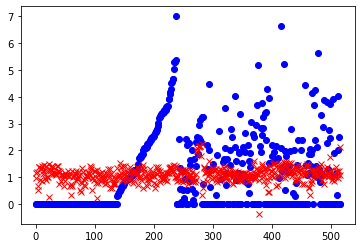

In [44]:
plt.plot(Tlog, 'ob')
plt.plot(Ys, 'xr')

In [45]:
w_s

array([ 1.11102577,  0.09845931, -0.00158518,  0.35258243,  0.01786126,
        0.02773904,  0.15360069, -0.29683741, -0.11355001,  0.04236118,
       -0.06830369,  0.10308585,  0.02514502])

#### Hmm, still not great even after normaliztion. Next I try using indicator values

In [46]:
df.loc[:,'month']

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [47]:
indicator_month = pd.get_dummies(df.loc[:, 'month'])
indicator_month

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,1,0,0,0,0,0,0,0,0,0,0
513,0,1,0,0,0,0,0,0,0,0,0,0
514,0,1,0,0,0,0,0,0,0,0,0,0
515,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
df.loc[:,'day']

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [49]:
indicator_day = pd.get_dummies(df.loc[:, 'day'])
indicator_day

,fri,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0
513,0,0,0,1,0,0,0
514,0,0,0,1,0,0,0
515,0,0,1,0,0,0,0


In [50]:
df.columns.values

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'], dtype=object)

In [51]:
X = pd.concat([
        df.iloc[:, :2], 
        indicator_month, 
        indicator_day,
        df.iloc[:, 4:-1]],
        axis=1)
X

,X,Y,apr,aug,dec,feb,jan,jul,jun,mar,...,tue,wed,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,0,0,0,0,0,0,0,1,...,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,0,0,0,0,0,0,0,0,...,1,0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,0,0,0,0,0,0,0,0,...,0,0,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,0,0,0,0,0,0,0,1,...,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,0,0,0,0,0,0,0,1,...,0,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,0,1,0,0,0,0,0,0,...,0,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,0,1,0,0,0,0,0,0,...,0,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,0,1,0,0,0,0,0,0,...,0,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,0,1,0,0,0,0,0,0,...,0,0,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [52]:
X = X.values # Converts Pandas DataFrame back to Numpy array
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)

In [53]:
normX = (X - mu) / std
pd.DataFrame(normX).describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,2.233331e-16,2.491023e-16,-1.344293e-16,2.473843e-16,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,...,2.405125e-17,-3.843906e-17,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.587360e+00,-1.871724e+00,-1.331035e-01,-7.433388e-01,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,...,-3.758728e-01,-3.415123e-01,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02
25%,-7.221360e-01,-2.440010e-01,-1.331035e-01,-7.433388e-01,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,...,-3.758728e-01,-3.415123e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02
50%,-2.895238e-01,-2.440010e-01,-1.331035e-01,-7.433388e-01,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,...,-3.758728e-01,-3.415123e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02
75%,1.008313e+00,5.698604e-01,-1.331035e-01,1.345282e+00,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,...,-3.758728e-01,-3.415123e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02
max,1.873537e+00,3.825306e+00,7.512952e+00,1.345282e+00,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,...,2.660475e+00,2.928152e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01


In [54]:
normX.shape

(517, 29)

In [55]:
# Add the bias term
X1i = np.hstack((np.ones((N, 1)), normX)) 

In [56]:
# Recompute the least squares solution using the normalized matrix `X1i`
X1i_inverse = np.linalg.pinv(X1i.T @ (X1i))
w_i = X1i_inverse @ X1i.T @ Tlog

In [57]:
# Calcualte the new predictions
Yi = X1i @ w_i

In [58]:
# Computes RMSE
np.sqrt(np.mean((Tlog- Yi)**2))

1.3442088524180986

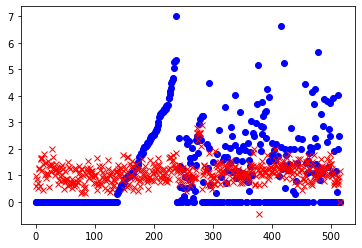

In [59]:
plt.plot(Tlog, 'ob')
plt.plot(Yi, 'xr')

### Better but still not great
##### Let's try Least Mean Squares
$w^{(k+1)} = w^{(k)} - \alpha(w^{(k)^T} \cdot x_k - t_k) \times x_k$

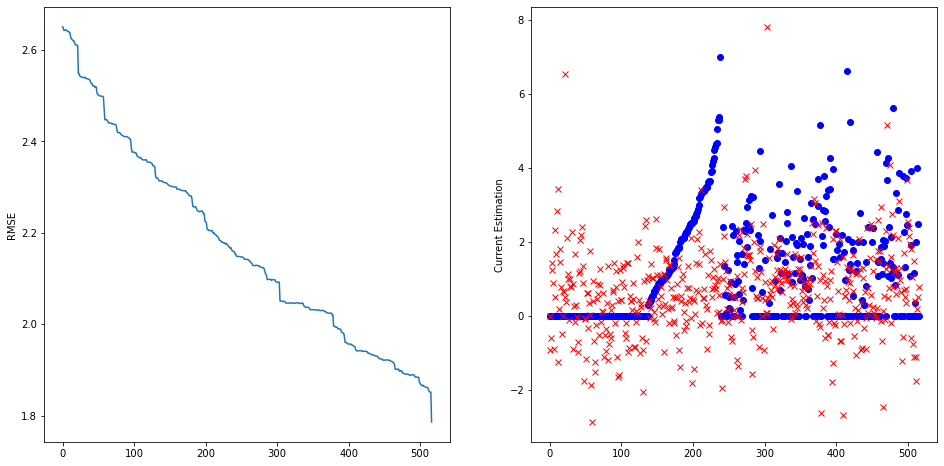

In [60]:
import IPython.display as ipd  # for display and clear_output


# Read one by one and update weights 
alpha = 0.001 

w_lms = np.random.rand(X1i.shape[1])

fig = plt.figure(figsize=(16,8))

errs = []
# Read data samples one-by-one making weight updates and predictions 
for k in range(N):
    # TODO: Add the LMS online update 
    w_lms -= alpha * (w_lms.T @ X1i[k] - Tlog[k]) * X1i[k]
    
    # TODO: Use the current weights `w_lms` to make predictions for all of `Xli`
    Y_lms = X1i @ w_lms
    errs.append(np.sqrt(np.mean((Tlog - Y_lms)**2)))
    
    plt.clf()
    plt.subplot(1, 2, 1)
    plt.plot(errs) # blue line left graph
    plt.ylabel("RMSE")
    
    plt.subplot(1,2, 2)
    plt.plot(Tlog[:k], 'ob') # blue line right graph
    plt.plot(Y_lms[:k], 'xr') # orange line right graph
    plt.ylabel("Current Estimation")
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)

In [61]:
print("RMSE: {0}".format(errs[-1]))

RMSE: 1.7859214794398885


In [62]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    # Checks to make sure ratio sums to 1
    assert(np.sum(ratio) == 1)
    
    # Shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # Store the number of data samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
         # Number of rows that corresponds to kth element in ratios
        nrows = int(round(N * r)) 
        
        # If we are on the last ratio simply use the remaining data samples
        if k == len(ratio)-1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [63]:
Xlst, Tlst = partition(pd.DataFrame(X1i), pd.DataFrame(Tlog))

In [64]:
# Train data shape
print("Train data shape: {}".format(Xlst[0].shape))
# Train target data shape
print("Train target shape: {}".format(Tlst[0].shape))

Train data shape: (414, 30)
Train target shape: (414, 1)


In [65]:
# Test data shape
print("Test data shape: {}".format(Xlst[1].shape))
# Test target data shape
print("Test target shape: {}".format(Tlst[1].shape))

Test data shape: (103, 30)
Test target shape: (103, 1)


In [74]:
alpha = 0.001 

# TODO: create (Xtrain, Ttrain) for training and (Xtest, Ttest) for testing
Xtrain, Xtest = [xx.values for xx in Xlst]
Ttrain, Ttest = [tt.values for tt in Tlst]

# Random initialization of weight w 
# np.random.seed(0) # Setting the seed ensures we get the same RMSE output and predictions
w = np.random.rand(Xtrain.shape[1], Ttrain.shape[1])

fig = plt.figure(figsize=(16,8))

errs = []
# Read data samples one by one and update weights 
for i in range(Xtrain.shape[0]):
    # TODO: Compute the LMS online update
    w -= (alpha *(w.T @ Xtrain[0] - Ttrain[0]) * Xtrain[0]).reshape(w.shape)
# TODO: Compute and store the predictions   
Yp = Xtest @ w
np.sqrt(np.mean((Yp -  Ttest)**2)) # RMSE of test data partition

2.9909877098133153

<Figure size 1152x576 with 0 Axes>

In [75]:
Ttrain[0].shape

(1,)

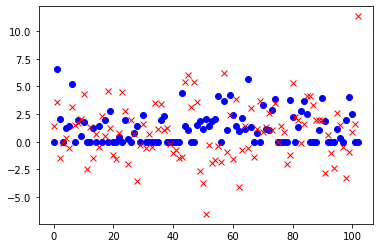

In [76]:
plt.plot(Ttest, 'ob')
plt.plot(Yp, 'xr')

In [77]:
# Compute the LS weights
Xtrain_inverse = np.linalg.pinv(Xtrain.T @ Xtrain)
w = Xtrain_inverse @ Xtrain.T @ Ttrain

# Compute and store the predictions into `Yp2`
Yp2 = Xtest @ w
np.sqrt(np.mean((Yp2 -  Ttest)**2))

1.9619284663381855

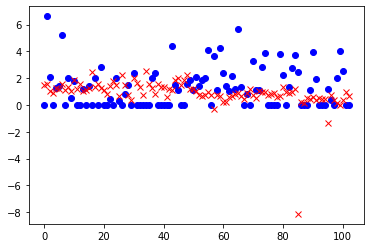

In [78]:
plt.plot(Ttest, 'ob')
plt.plot(Yp2, 'xr')